In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [3]:
df = pd.read_csv("student_prediction.csv")

In [4]:
df

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [5]:
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [6]:
df.tail()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4
144,STUDENT145,1,1,1,5,2,2,2,3,1,...,2,1,3,2,3,1,5,4,9,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [8]:
df.shape

(145, 33)

In [9]:
df.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
AGE,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
GENDER,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
HS_TYPE,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
SCHOLARSHIP,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
WORK,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
ACTIVITY,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
PARTNER,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
SALARY,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
TRANSPORT,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
LIVING,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


In [10]:
df["COURSE ID"].unique()


array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [11]:
df.describe(include=object)

,STUDENTID
count,145
unique,145
top,STUDENT1
freq,1


In [12]:
df = df.drop('STUDENTID', axis=1)

In [13]:
#checking the  duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


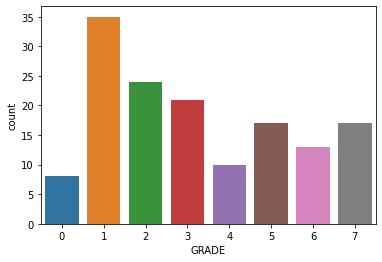

In [14]:
sns.countplot(df['GRADE'],label="Count")
plt.show()

In [15]:
X = df.drop('GRADE', axis=1)
y = df['GRADE']

# list discrete features that have integer dtypes for using MI (Mutual Information)
discrete_features = X.dtypes == int

In [16]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

COURSE ID        0.491416
GENDER           0.176673
MOTHER_EDU       0.157819
EXP_GPA          0.152561
CUML_GPA         0.144045
ATTEND           0.134883
AGE              0.132892
FATHER_JOB       0.082216
SCHOLARSHIP      0.073717
IMPACT           0.073269
TRANSPORT        0.058359
LIVING           0.037292
PARTNER          0.029098
LIKES_DISCUSS    0.026543
LISTENS          0.017192
STUDY_HRS        0.008637
WORK             0.006424
ATTEND_DEPT      0.001855
NOTES            0.001841
READ_FREQ_SCI    0.000000
READ_FREQ        0.000000
ACTIVITY         0.000000
MOTHER_JOB       0.000000
PREP_STUDY       0.000000
PREP_EXAM        0.000000
KIDS             0.000000
#_SIBLINGS       0.000000
CLASSROOM        0.000000
FATHER_EDU       0.000000
HS_TYPE          0.000000
SALARY           0.000000
Name: MI Scores, dtype: float64

In [17]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0]

X = drop_uninformative(X, mi_scores)

In [18]:
kmeans = KMeans(n_clusters=8, random_state=0)
X["Cluster"] = kmeans.fit_predict(X)

In [19]:
decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)

predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.11      0.12      0.12         8
           1       0.31      0.37      0.34        35
           2       0.38      0.42      0.40        24
           3       0.29      0.33      0.31        21
           4       0.00      0.00      0.00        10
           5       0.13      0.12      0.12        17
           6       0.20      0.08      0.11        13
           7       0.44      0.47      0.46        17

    accuracy                           0.29       145
   macro avg       0.23      0.24      0.23       145
weighted avg       0.27      0.29      0.28       145



In [20]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X, y)

predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.29      0.51      0.37        35
           2       0.36      0.33      0.35        24
           3       0.31      0.24      0.27        21
           4       0.00      0.00      0.00        10
           5       0.25      0.12      0.16        17
           6       0.29      0.15      0.20        13
           7       0.36      0.47      0.41        17

    accuracy                           0.31       145
   macro avg       0.27      0.26      0.26       145
weighted avg       0.29      0.31      0.29       145



In [21]:
knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.20      0.25      0.22         8
           1       0.32      0.60      0.42        35
           2       0.23      0.12      0.16        24
           3       0.22      0.10      0.13        21
           4       0.00      0.00      0.00        10
           5       0.27      0.18      0.21        17
           6       0.18      0.23      0.20        13
           7       0.24      0.24      0.24        17

    accuracy                           0.26       145
   macro avg       0.21      0.21      0.20       145
weighted avg       0.23      0.26      0.23       145



In [22]:
gnb = GaussianNB()
gnb.fit(X,y)
predict = cross_val_predict(estimator = gnb, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.14      0.50      0.22         8
           1       0.38      0.17      0.24        35
           2       0.33      0.08      0.13        24
           3       0.14      0.05      0.07        21
           4       0.00      0.00      0.00        10
           5       0.10      0.06      0.07        17
           6       0.17      0.31      0.22        13
           7       0.24      0.71      0.36        17

    accuracy                           0.21       145
   macro avg       0.19      0.23      0.16       145
weighted avg       0.23      0.21      0.17       145



In [23]:
scv = SVC()
scv.fit(X,y)
predict = cross_val_predict(estimator = scv, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.30      0.77      0.43        35
           2       0.18      0.08      0.11        24
           3       0.33      0.05      0.08        21
           4       0.00      0.00      0.00        10
           5       0.17      0.06      0.09        17
           6       0.00      0.00      0.00        13
           7       0.33      0.59      0.43        17

    accuracy                           0.29       145
   macro avg       0.21      0.21      0.17       145
weighted avg       0.23      0.29      0.20       145



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
